# Importing Libraries

In [ ]:
import pandas as pd
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import math
import random
from scipy.stats import rankdata
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm

# Importing Data & Making Class Out of Medv

In [2]:
df=pd.read_excel("/Users/sunitjadeja/Desktop/TISS All Subject/Machine Learning/HousingData.xls")
df
df["class"]=np.where(df["MEDV"]<20,"Below 20", "Above 20")
condition= [(df["MEDV"]<=20),(df["MEDV"]>20)]
values=[-1,1]
df["class_di"]=np.select(condition,values)
print(df.columns)
print(df.describe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'class', 'class_di'],
      dtype='object')
<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   


# Train & Test Split

In [3]:
test_size=0.30
seed= 234
Y=df[["class_di"]]
X=df[["LSTAT","RM","class_di"]]
train_data, test_data = train_test_split(X,test_size=test_size, random_state=seed)

In [4]:
y_train=train_data[["class_di"]]
x_train=train_data[["LSTAT","RM"]]
y_actual_test=test_data[["class_di"]]
x_actual_test=test_data[["LSTAT","RM"]]

# Model Builiding & C is used for Regularization

In [5]:
C = 1.0
model_svm = svm.SVC(kernel='linear',C=C)
h=model_svm.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Predicting Values on Test Data 

In [6]:
y_predicted = model_svm.predict(x_actual_test)

# Confusion Matrix & Accuracy

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_actual_test, y_predicted))
print(classification_report(y_actual_test,y_predicted))

[[53 10]
 [12 77]]
              precision    recall  f1-score   support

          -1       0.82      0.84      0.83        63
           1       0.89      0.87      0.88        89

    accuracy                           0.86       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



# Plotting Decision Boundary, Margins & Corresponding Vectors

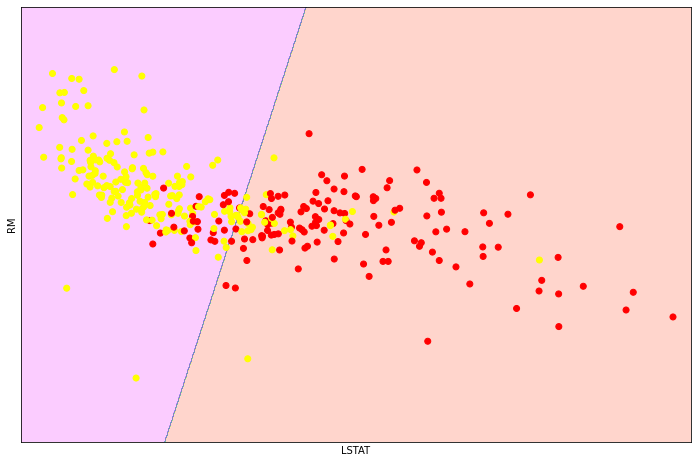

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


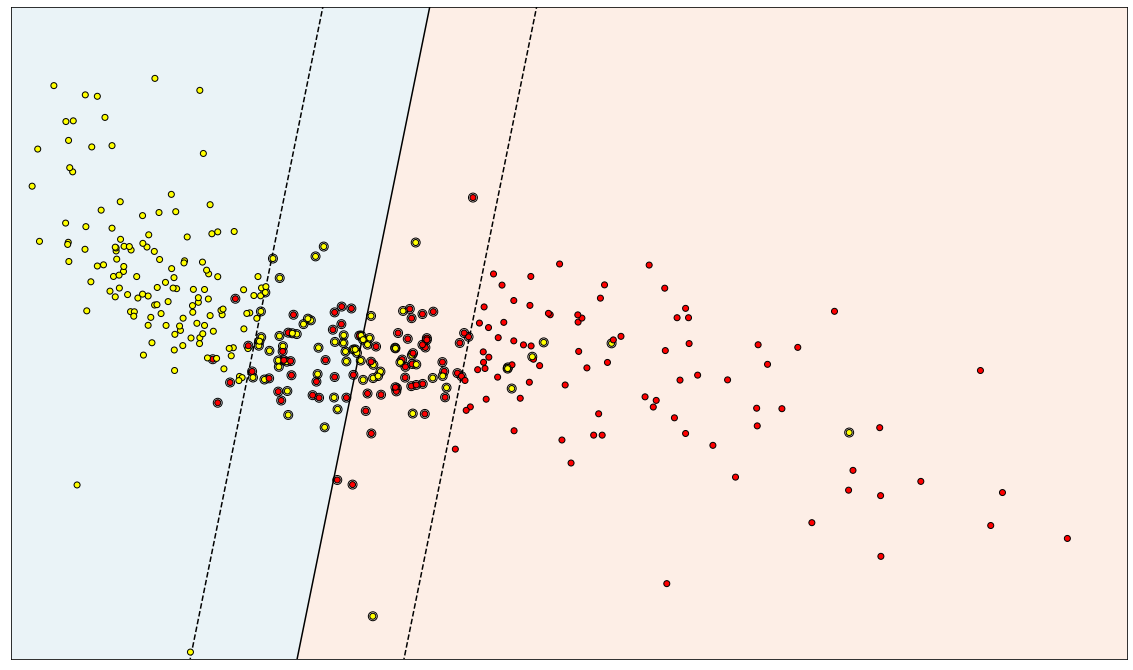

In [9]:
# create a mesh to plot in
h = .02
x_min, x_max = x_train["LSTAT"].min() - 1, x_train["LSTAT"].max() + 1
y_min, y_max = x_train["RM"].min() - 1, x_train["RM"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel']
plt.subplots(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.gist_rainbow, alpha=0.2)
plt.scatter(x_train["LSTAT"], x_train["RM"], c=y_train["class_di"],cmap=plt.cm.autumn)
plt.xlabel('LSTAT')
plt.ylabel('RM')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()



Y=train_data[["class_di"]]
X=train_data[["LSTAT","RM"]]
fignum = 1
fig,ax = plt.subplots(figsize=(20,12))
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-80, 80)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.cm.RdBu,
    )
    plt.scatter(
        X["LSTAT"], X["RM"], c=Y["class_di"], zorder=10, cmap=plt.cm.autumn, edgecolors="k"
    )

    plt.axis("tight")
    x_min = 1
    x_max = 39
    y_min = 3.5
    y_max = 9

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.cm.RdBu, alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum 

plt.show()

# LSTAT & RM Values of Vectors

In [10]:
model_svm.support_vectors_

array([[15.7  ,  6.006],
       [15.12 ,  6.129],
       [14.67 ,  5.99 ],
       [16.29 ,  6.167],
       [12.43 ,  5.706],
       [10.63 ,  6.405],
       [11.28 ,  5.727],
       [14.52 ,  6.202],
       [13.61 ,  5.731],
       [12.87 ,  6.229],
       [16.59 ,  6.219],
       [16.74 ,  7.393],
       [15.17 ,  6.208],
       [16.21 ,  5.913],
       [14.64 ,  5.803],
       [10.26 ,  6.096],
       [14.44 ,  5.966],
       [15.02 ,  6.411],
       [14.33 ,  6.027],
       [15.1  ,  5.569],
       [13.15 ,  5.741],
       [14.65 ,  6.376],
       [15.17 ,  6.193],
       [14.15 ,  5.786],
       [10.11 ,  5.757],
       [11.41 ,  5.841],
       [12.27 ,  6.474],
       [11.5  ,  5.705],
       [12.67 ,  5.898],
       [ 7.88 ,  6.03 ],
       [14.59 ,  6.454],
       [10.45 ,  6.254],
       [14.19 ,  6.251],
       [14.13 ,  5.759],
       [13.09 ,  5.594],
       [15.76 ,  5.928],
       [ 8.05 ,  5.663],
       [13.44 ,  6.137],
       [10.3  ,  6.021],
       [14.7  ,  6.081],


# Index of Vectors

In [11]:
model_svm.support_ 

array([  2,   4,  14,  22,  23,  24,  30,  37,  40,  49,  52,  57,  58,
        68,  70,  73,  77,  80,  81,  92,  93,  95,  98, 105, 110, 112,
       117, 118, 122, 127, 134, 135, 151, 152, 173, 176, 185, 188, 198,
       202, 215, 218, 219, 224, 231, 233, 238, 244, 245, 246, 256, 257,
       280, 283, 285, 287, 288, 291, 292, 318, 320, 324, 327, 329, 340,
       345,  11,  12,  26,  28,  38,  39,  43,  44,  54,  55,  56,  62,
        75,  76,  83,  88,  99, 100, 103, 108, 113, 116, 120, 124, 130,
       133, 144, 147, 153, 158, 180, 181, 182, 197, 199, 204, 205, 206,
       220, 221, 223, 227, 228, 234, 235, 236, 240, 249, 264, 270, 271,
       276, 277, 284, 286, 299, 307, 310, 316, 325, 326, 336, 338, 343,
       344, 346, 350], dtype=int32)

# Count of Classes in Vectors 1 is 66 & -1 is 67

In [12]:
model_svm.n_support_ 

array([66, 67], dtype=int32)